<a id="toc"></a>
# Deimos source modelling
***

Contents :
1. [Creation of SYNED input file (.json)](#syned)
1. [**on-axis** spectrum of an ideal planar undulator](#spectrum_axis)
1. [spectrum of an ideal planar undulator **through a slit**](#spectrum_slit)
1. [**on-axis** tuning curve of an ideal planar undulator](#tc_axis)
1. [tuning curve of an ideal planar undulator **through a slit**](#tc_slit)
1. [Visualisations](#visu)

In [1]:
__author__ = ['Rafael Celestre']
__contact__ = 'rafael.celestre@synchrotron-soleil.fr'
__license__ = 'GPL-3.0'
__copyright__ = 'Synchrotron SOLEIL, Saint Aubin, France'
__created__ = '04/NOV/2024'
__changed__ = '04/NOV/2024'

import sys

import barc4sr.sr_undulator as und
import numpy as np
from barc4sr.aux_utils import (
                            ElectronBeam,
                            MagneticStructure,
                            SynchrotronSource,
)
from barc4xoc.plots import plot_tuning_curve
from scipy.constants import nano, pico

# checking we are using the correct python:
print(sys.executable)
print(sys.version)

%load_ext autoreload
%autoreload 2

ImportError: cannot import name 'ElectronBeam' from 'barc4sr.aux_utils' (c:\users\rafae\work\software\barc4sr\barc4sr\aux_utils.py)

In [2]:
e0, ei, ef, dE = 0, 250, 5000, 0.5
ne = int((ef-ei)/dE)+1

# aperture = 0.2e-3   # mrad
slit_position = 21  # m

window = 1.2e-3 # np.tan(aperture/2)*slit_position*2
aperture = np.arctan(window/2/slit_position)

<a id="syned"></a>
### Creation of SYNED input file (.json)

[Back to the top](#toc)

In [3]:
u52 = MagneticStructure(period_length=52.4e-3, number_of_periods=30)

In [4]:
straight_section = ElectronBeam()
straight_section.from_twiss(energy=2.75, energy_spread=0.1025/100, current=0.500,
                            emittance=3.94*nano, coupling=1/100,
                            beta_x=3.9210, beta_y=2.1191, 
                            alpha_x=0.0514, alpha_y=0.1430,
                            eta_x=0.1632, eta_y=-0.0046,
                            etap_x=0.0015, etap_y=0.0018)
straight_section.print_rms()

u52.set_resonant_energy(350, 1, straight_section.energy_in_GeV, "v")

deimos = SynchrotronSource(straight_section, u52)
deimos.write_syned_config(r".\resources\oasys_soleil_hu52.json","Soleil - HU52")

electron beam:
            >> x/xp = 208.03 um vs. 31.62 urad
            >> y/yp = 10.24 um vs. 4.71 urad


In [5]:
straight_section = ElectronBeam()
straight_section.from_twiss(energy=2.75, energy_spread=0.0906/100, current=0.500,
                  emittance_x=84.55*pico, emittance_y=25.36*pico,
                  beta_x=1.59, eta_x=0, etap_x=0, alpha_x=0,
                  beta_y=1.51, eta_y=0, etap_y=0, alpha_y=0)
straight_section.print_rms()

u52.set_resonant_energy(350, 1, straight_section.energy_in_GeV, "v")

deimos = SynchrotronSource(straight_section, u52)
deimos.write_syned_config(r".\resources\oasys_soleil-II_hu52.json","Soleil-II - HU52")

electron beam:
            >> x/xp = 11.59 um vs. 7.29 urad
            >> y/yp = 6.19 um vs. 4.10 urad


<a id="spectrum_axis"></a>
### Calculation of the **on-axis** spectrum of an ideal planar undulator
[Back to the top](#toc)

In [6]:
soleil_u52_SOA = und.spectrum(file_name=".\\results\source\SOLEIL-U52mm_on_axis",
                        json_file=".\\resources\\oasys_soleil_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=slit_position,
                        hor_slit=1e-23,
                        ver_slit=1e-23)

Undulator spectrum calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing on-axis spectrum from filament electron beam ... completed
Undulator spectrum calculation using SRW: finished.
>> Total elapsed time: 797.89 ms


In [7]:
soleil_ii_u52_SOA = und.spectrum(file_name=".\\results\source\SOLEIL-II-U52mm_on_axis",
                        json_file=".\\resources\\oasys_soleil-ii_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=slit_position,
                        hor_slit=1e-23,
                        ver_slit=1e-23)

Undulator spectrum calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing on-axis spectrum from filament electron beam ... completed
Undulator spectrum calculation using SRW: finished.
>> Total elapsed time: 684.30 ms


<a id="spectrum_slit"></a>
### Calculation of the on spectrum of an ideal planar undulator **through a slit**
[Back to the top](#toc)

In [8]:
soleil_u52_STS = und.spectrum(file_name=".\\results\source\SOLEIL-U52mm_slit",
                        json_file=".\\resources\\oasys_soleil_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=slit_position,
                        hor_slit=window,
                        ver_slit=window,
                        parallel=True)

Undulator spectrum calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing flux through finite aperture (simplified partially-coherent simulation) in parallel... 
>>> ellapse time:
 Core 1: 0.18 s for 792 pts (E0 = 250.0 eV).
 Core 2: 0.34 s for 792 pts (E0 = 646.0 eV).
 Core 3: 0.57 s for 792 pts (E0 = 1042.0 eV).
 Core 4: 1.23 s for 792 pts (E0 = 1438.0 eV).
 Core 5: 1.70 s for 792 pts (E0 = 1834.0 eV).
 Core 6: 2.57 s for 792 pts (E0 = 2230.0 eV).
 Core 7: 3.83 s for 792 pts (E0 = 2626.0 eV).
 Core 8: 4.93 s for 792 pts (E0 = 3022.0 eV).
 Core 9: 6.21 s for 792 pts (E0 = 3418.0 eV).
 Core 10: 7.25 s for 791 pts (E0 = 3814.0 eV).
 Core 11: 8.44 s for 791 pts (E0 = 4209.5 eV).
 Core 12: 10.20 s for 791 pts (E0 = 4605.0 eV).
completed
Undulator spectrum calculation using SRW: finished.
>> Total elapsed time: 15.20 s


In [9]:
soleil_ii_u52_STS = und.spectrum(file_name=".\\results\source\SOLEIL-II-U52mm_slit",
                        json_file=".\\resources\\oasys_soleil-ii_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=slit_position,
                        hor_slit=window,
                        ver_slit=window,
                        parallel=True)

Undulator spectrum calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing flux through finite aperture (simplified partially-coherent simulation) in parallel... 
>>> ellapse time:
 Core 1: 0.02 s for 792 pts (E0 = 250.0 eV).
 Core 2: 0.05 s for 792 pts (E0 = 646.0 eV).
 Core 3: 0.12 s for 792 pts (E0 = 1042.0 eV).
 Core 4: 0.25 s for 792 pts (E0 = 1438.0 eV).
 Core 5: 0.42 s for 792 pts (E0 = 1834.0 eV).
 Core 6: 0.65 s for 792 pts (E0 = 2230.0 eV).
 Core 7: 0.93 s for 792 pts (E0 = 2626.0 eV).
 Core 8: 1.41 s for 792 pts (E0 = 3022.0 eV).
 Core 9: 1.88 s for 792 pts (E0 = 3418.0 eV).
 Core 10: 2.40 s for 791 pts (E0 = 3814.0 eV).
 Core 11: 2.88 s for 791 pts (E0 = 4209.5 eV).
 Core 12: 3.55 s for 791 pts (E0 = 4605.0 eV).
completed
Undulator spectrum calculation using SRW: finished.
>> Total elapsed time: 3.61 s


<a id="tc_axis"></a>
### Calculation of the **on-axis** tuning curve of an ideal planar undulator
[Back to the top](#toc)

In [10]:
e0, ei, ef, dE = 0, 250, 5000, 5
ne = int((ef-ei)/dE)+1

In [11]:
soleil_u52_TCOA = und.tuning_curve(file_name=".\\results\source\SOLEIL-U52mm_on_axis",
                        json_file=".\\resources\\oasys_soleil_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=slit_position,
                        nHarmMax = 14,
                        Kmax = u52.K_vertical,
                        hor_slit=1e-23,
                        ver_slit=1e-23,
                        parallel=True)

Undulator K-tuning curve calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing on-axis tuning curve from filament electron beam in parallel ... 
Undulator K-tuning curve calculation using SRW: finished.
>> Total elapsed time: 44.59 s


In [12]:
soleil_ii_u52_TCOA = und.tuning_curve(file_name=".\\results\source\SOLEIL-II-U52mm_on_axis",
                        json_file=".\\resources\\oasys_soleil-ii_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=slit_position,
                        nHarmMax = 14,
                        Kmax = u52.K_vertical,
                        hor_slit=1e-23,
                        ver_slit=1e-23,
                        parallel=True)

Undulator K-tuning curve calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing on-axis tuning curve from filament electron beam in parallel ... 
Undulator K-tuning curve calculation using SRW: finished.
>> Total elapsed time: 39.47 s


<a id="tc_slit"></a>
### Calculation of the tuning curve of an ideal planar undulator **through a slit**
[Back to the top](#toc)

In [13]:
soleil_u52_TCTS = und.tuning_curve(file_name=".\\results\source\SOLEIL-U52mm_slit",
                        json_file=".\\resources\\oasys_soleil_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=slit_position,
                        nHarmMax = 14,
                        Kmax = u52.K_vertical,
                        hor_slit=window,
                        ver_slit=window,
                        parallel=True)

Undulator K-tuning curve calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing flux through finite aperture (simplified / CalcElecFieldSR partially-coherent simulation) in parallel... 
completed
Undulator K-tuning curve calculation using SRW: finished.
>> Total elapsed time: 4 min 35.74 s


In [14]:
soleil_ii_u52_TCTS = und.tuning_curve(file_name=".\\results\source\SOLEIL-II-U52mm_slit",
                        json_file=".\\resources\\oasys_soleil-ii_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=slit_position,
                        nHarmMax = 14,
                        Kmax = u52.K_vertical,
                        hor_slit=window,
                        ver_slit=window,
                        parallel=True)

Undulator K-tuning curve calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing flux through finite aperture (simplified / CalcElecFieldSR partially-coherent simulation) in parallel... 
completed
Undulator K-tuning curve calculation using SRW: finished.
>> Total elapsed time: 4 min 9.97 s


<a id="visu"></a>
### Visualisations
[Back to the top](#toc)

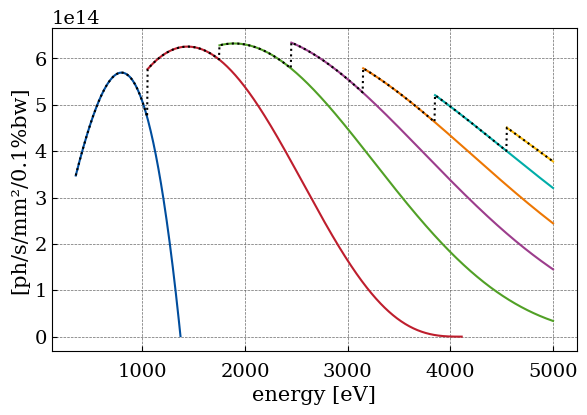

In [15]:
plot_tuning_curve(soleil_u52_TCOA, unit="[ph/s/mm²/0.1%bw]")

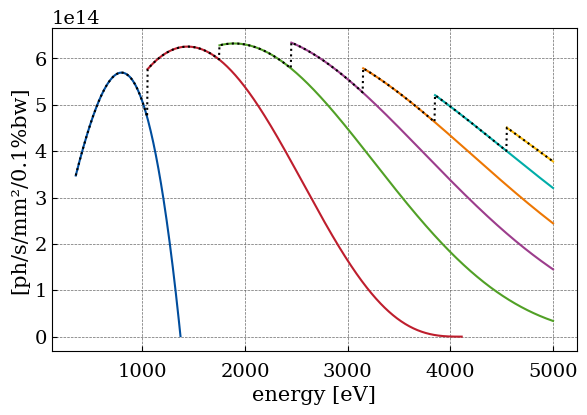

In [16]:
plot_tuning_curve(soleil_u52_TCOA, unit="[ph/s/mm²/0.1%bw]")

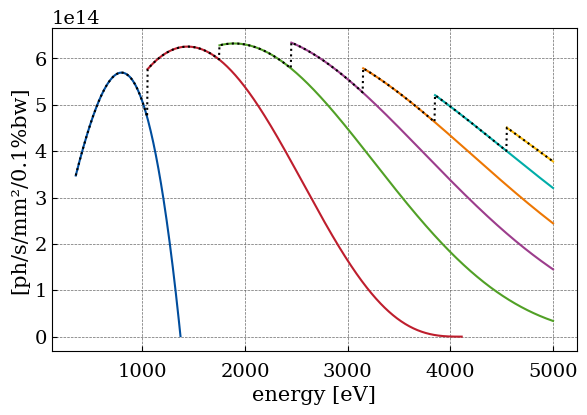

In [17]:
plot_tuning_curve(soleil_ii_u52_TCOA, unit="[ph/s/mm²/0.1%bw]")

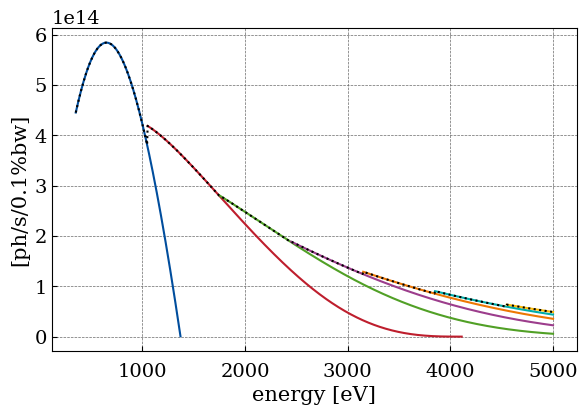

In [18]:
plot_tuning_curve(soleil_u52_TCTS, unit="[ph/s/0.1%bw]")

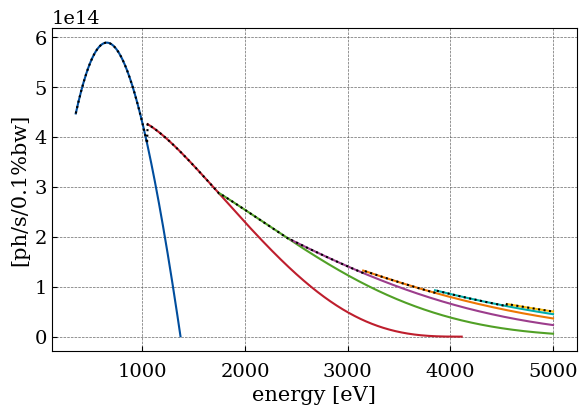

In [19]:
plot_tuning_curve(soleil_ii_u52_TCTS, unit="[ph/s/0.1%bw]")